In [5]:
# # # import pandas as pd
# # # from sklearn.feature_extraction.text import TfidfVectorizer
# # # from sklearn.decomposition import TruncatedSVD
# # # from sklearn.cluster import KMeans
# # # from sklearn.model_selection import train_test_split
# # # from sklearn.metrics import accuracy_score
# # # from sklearn.pipeline import Pipeline
# # # from nltk.corpus import stopwords
# # # from nltk.stem import PorterStemmer
# # # from sklearn.preprocessing import LabelEncoder
# # # from sklearn.linear_model import LogisticRegression

# # # # Load data
# # # data = pd.read_csv('suicide.csv')

# # # # Preprocessing
# # # stop_words = set(stopwords.words('english'))
# # # stemmer = PorterStemmer()

# # # def preprocess_text(text):
# # #     text = text.lower()
# # #     text = ' '.join([word for word in text.split() if word.isalpha() and word not in stop_words])
# # #     text = ' '.join([stemmer.stem(word) for word in text.split()])
# # #     return text

# # # data['clean_text'] = data['Tweet'].apply(preprocess_text)

# # # # Feature extraction
# # # tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# # # tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text'])

# # # # Dimensionality reduction
# # # svd = TruncatedSVD(n_components=100)
# # # svd_matrix = svd.fit_transform(tfidf_matrix)

# # # # Clustering
# # # kmeans = KMeans(n_clusters=2, random_state=42)
# # # kmeans.fit(svd_matrix)

# # # # Assign cluster labels
# # # data['cluster_label'] = kmeans.labels_

# # # # Split data into train and test sets
# # # X_train, X_test, y_train, y_test = train_test_split(svd_matrix, data['label'], test_size=0.2, random_state=42)

# # # # Train classifier
# # # classifier = LogisticRegression()
# # # classifier.fit(X_train, y_train)

# # # # Predictions
# # # y_pred = classifier.predict(X_test)

# # # # Evaluate classifier
# # # accuracy = accuracy_score(y_test, y_pred)
# # # print("Accuracy:", accuracy)

# # import pandas as pd
# # from sklearn.feature_extraction.text import CountVectorizer
# # from sklearn.decomposition import TruncatedSVD
# # from sklearn.cluster import KMeans
# # from sklearn.model_selection import train_test_split
# # from sklearn.metrics import accuracy_score
# # from sklearn.pipeline import Pipeline
# # from nltk.corpus import stopwords
# # from nltk.stem import PorterStemmer
# # from sklearn.preprocessing import LabelEncoder
# # from sklearn.linear_model import LogisticRegression

# # # Load data
# # data = pd.read_csv('suicide.csv')

# # # Preprocessing
# # stop_words = set(stopwords.words('english'))
# # stemmer = PorterStemmer()

# # def preprocess_text(text):
# #     text = text.lower()
# #     text = ' '.join([word for word in text.split() if word.isalpha() and word not in stop_words])
# #     text = ' '.join([stemmer.stem(word) for word in text.split()])
# #     return text

# # data['clean_text'] = data['Tweet'].apply(preprocess_text)

# # # Feature extraction (Bag of Words)
# # count_vectorizer = CountVectorizer(max_features=1000)
# # bow_matrix = count_vectorizer.fit_transform(data['clean_text'])

# # # Dimensionality reduction
# # svd = TruncatedSVD(n_components=100)
# # svd_matrix = svd.fit_transform(bow_matrix)

# # # Clustering
# # kmeans = KMeans(n_clusters=2, random_state=42)
# # kmeans.fit(svd_matrix)

# # # Assign cluster labels
# # data['cluster_label'] = kmeans.labels_

# # # Split data into train and test sets
# # X_train, X_test, y_train, y_test = train_test_split(svd_matrix, data['label'], test_size=0.2, random_state=42)

# # # Train classifier
# # classifier = LogisticRegression()
# # classifier.fit(X_train, y_train)

# # # Predictions
# # y_pred = classifier.predict(X_test)

# # # Evaluate classifier
# # accuracy = accuracy_score(y_test, y_pred)
# # print("Accuracy:", accuracy)


# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import TruncatedSVD
# from sklearn.cluster import KMeans

# # Load data
# data = pd.read_csv('suicide.csv')

# # Drop rows with missing values in the 'Tweet' column
# data.dropna(subset=['Tweet'], inplace=True)

# # Feature extraction (Bag of Words)
# count_vectorizer = CountVectorizer(max_features=1000)
# bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# # Dimensionality reduction
# svd = TruncatedSVD(n_components=100)
# svd_matrix = svd.fit_transform(bow_matrix)

# # Clustering
# kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans.fit(svd_matrix)

# # Assign cluster labels
# data['cluster_label'] = kmeans.labels_

# # Evaluate clustering results (compare with Suicide labels)
# # Implement your evaluation steps here

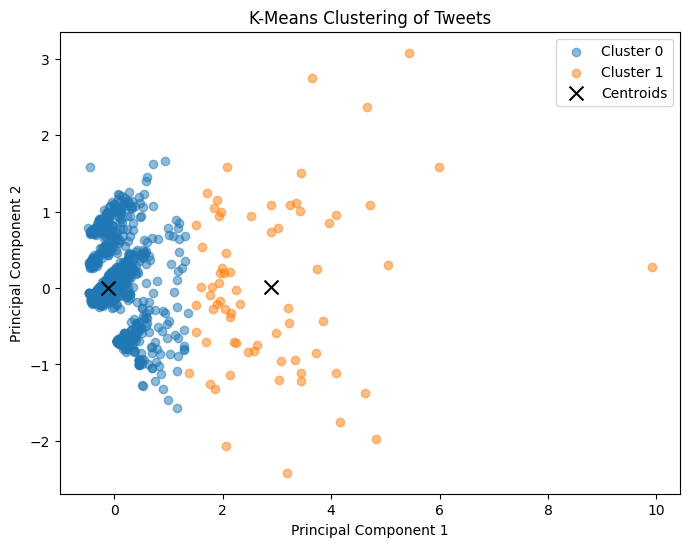

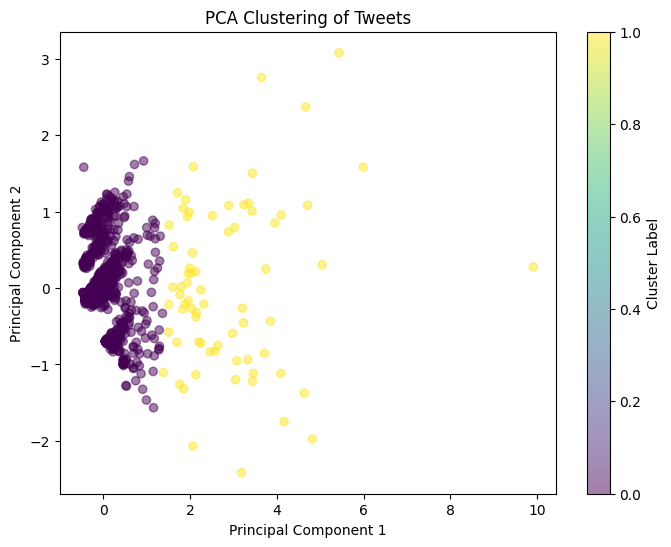

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing values in the 'Tweet' column
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_matrix)


# Assign cluster labels
data['cluster_label'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster separately
for cluster_label in range(2):
    plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0], 
                pca_matrix[data['cluster_label'] == cluster_label, 1], 
                label=f'Cluster {cluster_label}', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')

plt.title('K-Means Clustering of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clustering results
plt.figure(figsize=(8, 6))
plt.scatter(pca_matrix[:, 0], pca_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
plt.title('PCA Clustering of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

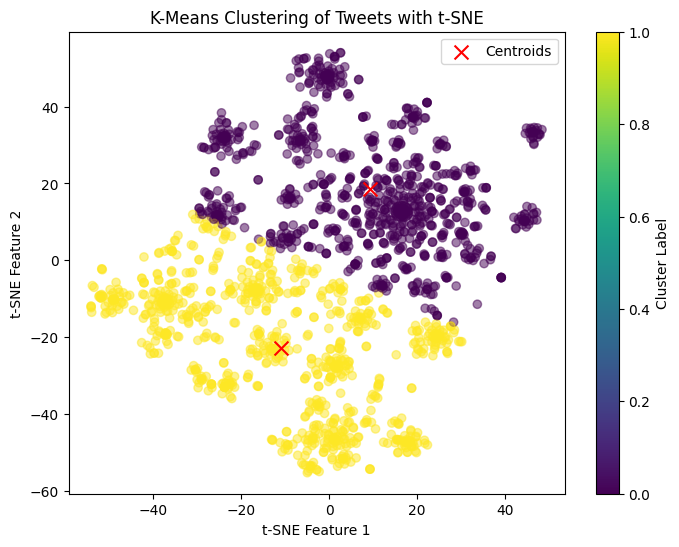

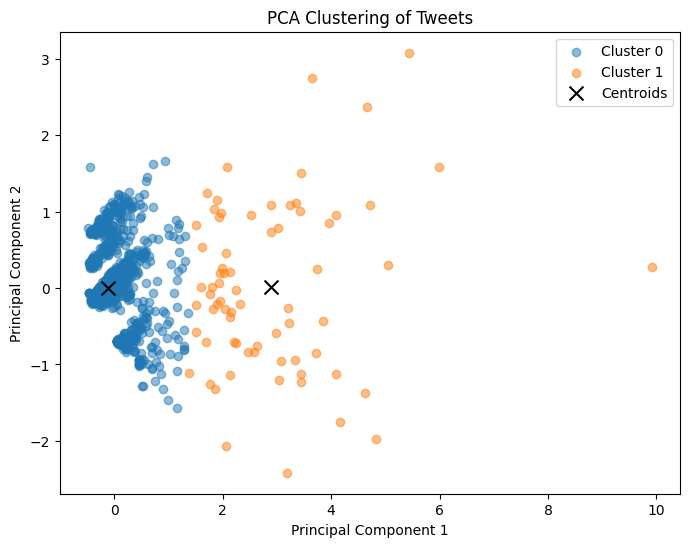

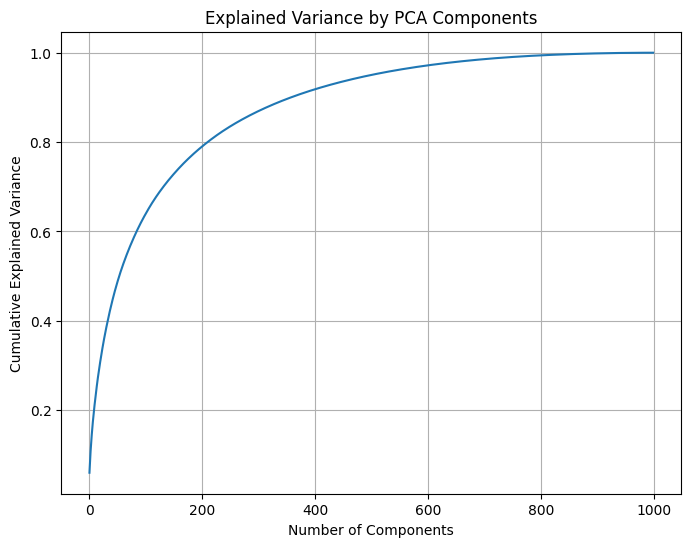

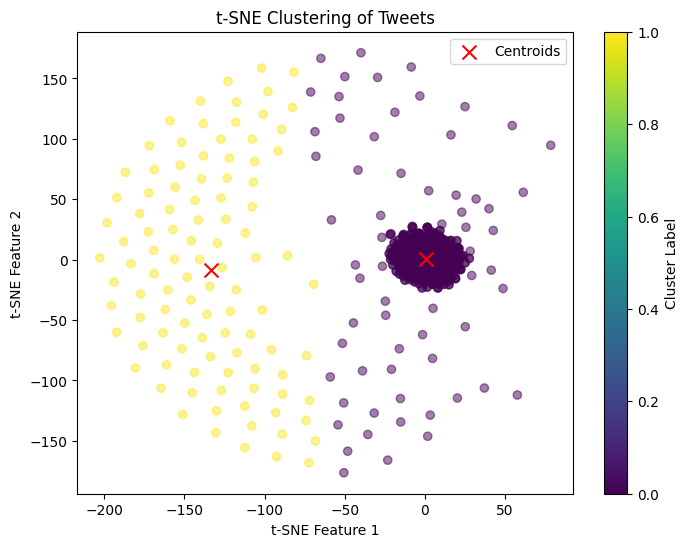

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Initial dimensionality reduction with PCA
pca = PCA(n_components=50)  # Reduce to 50 dimensions for t-SNE efficiency
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Further dimensionality reduction and visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_matrix = tsne.fit_transform(pca_matrix)

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster_label'] = kmeans.fit_predict(tsne_matrix)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the clusters
plt.scatter(tsne_matrix[:, 0], tsne_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

# Plot details
plt.title('K-Means Clustering of Tweets with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming 'data' is your DataFrame with the 'Tweet' column available

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_matrix)
data['cluster_label'] = kmeans.labels_

# PCA Clustering Plot
plt.figure(figsize=(8, 6))
for cluster_label in range(2):
    plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0], 
                pca_matrix[data['cluster_label'] == cluster_label, 1], 
                label=f'Cluster {cluster_label}', alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')
plt.title('PCA Clustering of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Explained Variance Plot
pca_full = PCA().fit(bow_matrix.toarray())
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()



# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=3000, random_state=42)
tsne_results = tsne.fit_transform(bow_matrix.toarray())

# Clustering with KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tsne_results)
data['cluster_label'] = kmeans.labels_

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('t-SNE Clustering of Tweets')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

25      johnshopkins bloodstain carpet ready gooo http...
43                             brushin mah teef secularly
70      stacyonbob ate candy cigarettes eat wax drink ...
100     home school yay bad actually nice dinner grace...
121                 fussy age long female change rule lol
                              ...                        
1757       secbarbie even figure turkey pretty close iraq
1765                 elliottcable prefer poopdiary meself
1766                            ooh snowboardlite fun app
1770                            missxu penclip soooo cool
1773    totally bought high school musical today mean ...
Name: Tweet, Length: 102, dtype: object

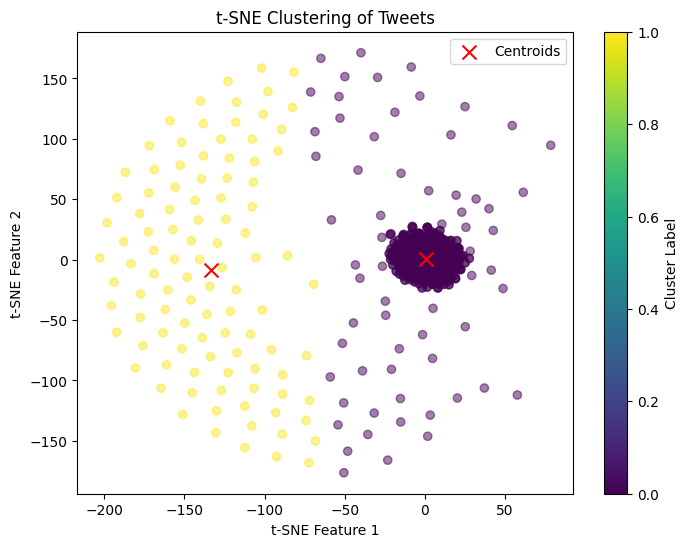

In [8]:
# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=3000, random_state=42)
tsne_results = tsne.fit_transform(bow_matrix.toarray())

# Clustering with KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tsne_results)
data['cluster_label'] = kmeans.labels_

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('t-SNE Clustering of Tweets')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

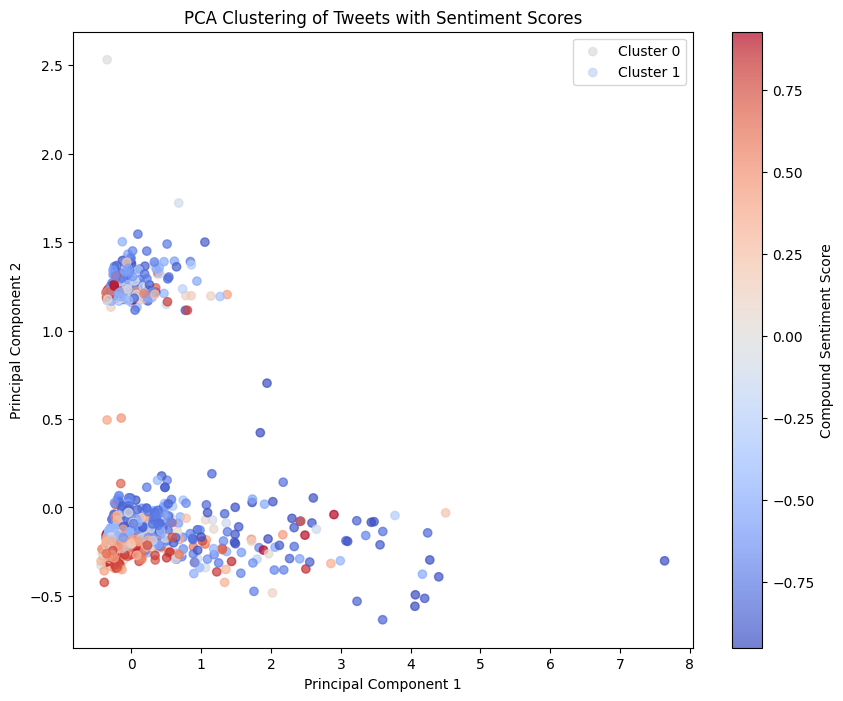

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing values in the 'Tweet' column
data.dropna(subset=['Tweet'], inplace=True)

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each tweet
data['compound_score'] = data['Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Clustering with K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_matrix)

# Assign cluster labels
data['cluster_label'] = kmeans.labels_

# Plotting the clusters with sentiment scores
plt.figure(figsize=(10, 8))

# Plot each cluster separately
for cluster_label in range(2):
    plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0], 
                pca_matrix[data['cluster_label'] == cluster_label, 1], 
                c=data[data['cluster_label'] == cluster_label]['compound_score'], 
                cmap='coolwarm', alpha=0.7, label=f'Cluster {cluster_label}')

plt.title('PCA Clustering of Tweets with Sentiment Scores')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Compound Sentiment Score')
plt.legend()
plt.show()

In [15]:
# Anything

In [16]:
print('hello')

hello


NaN values found in 'Tweet' column. Consider removing or replacing them before proceeding.


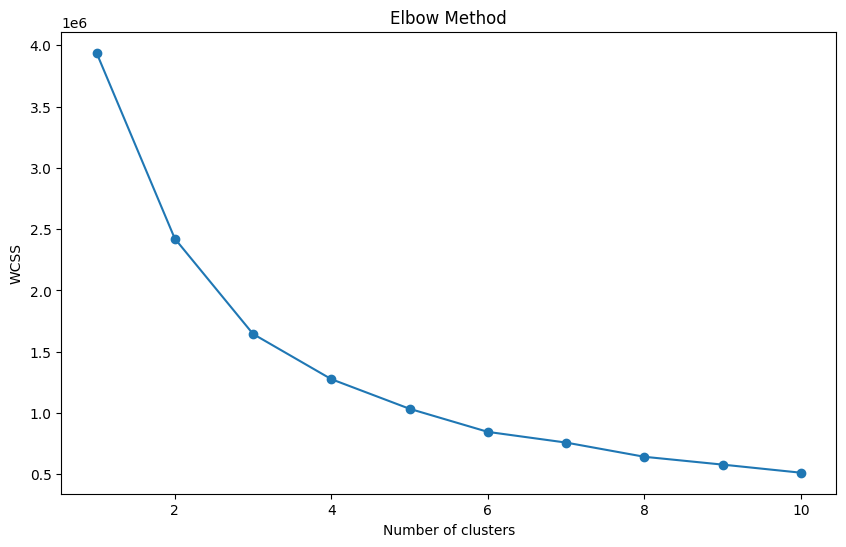

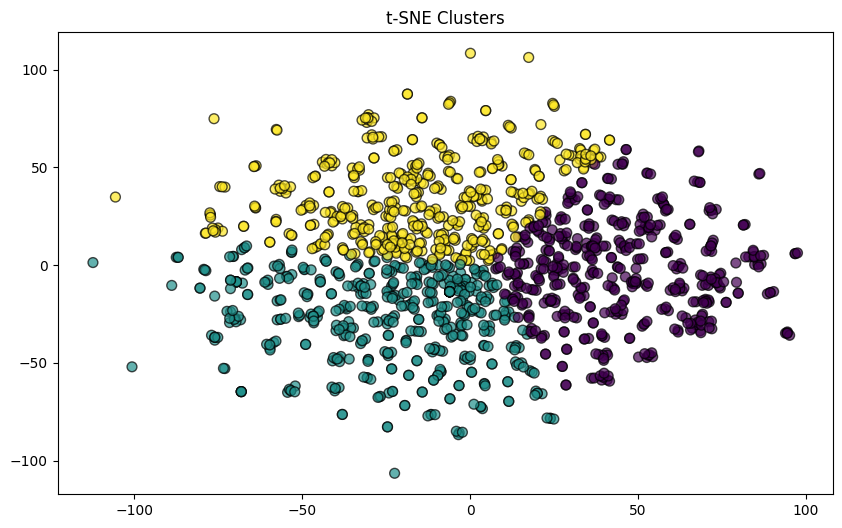

In [23]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset, ignoring the suicide indication column
data = pd.read_csv('suicide.csv', usecols=['Tweet'])

# Initialize VADER for sentiment analysis
analyzer = SentimentIntensityAnalyzer()

# Compute VADER compound scores
data['vader_score'] = data['Tweet'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
if data['Tweet'].isnull().any():
    print("NaN values found in 'Tweet' column. Consider removing or replacing them before proceeding.")
data = data.dropna(subset=['Tweet'])


# Vectorize tweets using Bag of Words
vectorizer = CountVectorizer(max_features=1000)
X_bow = vectorizer.fit_transform(data['Tweet']).toarray()

# Combine BoW features with VADER scores
vader_scores = data['vader_score'].values.reshape(-1, 1)
X_combined = np.hstack((X_bow, vader_scores))

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_combined)

# Split into training and validation sets
X_train, X_validation = train_test_split(X_standardized, test_size=0.2, random_state=42)

# Apply t-SNE to the training data
tsne = TSNE(n_components=2, perplexity=5, random_state=99)
X_train_tsne = tsne.fit_transform(X_train)

# Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train_tsne)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow plot, choose the optimal number of clusters
n_clusters_optimal = 3  # Example; adjust based on your plot

# Perform k-means clustering
kmeans_final = KMeans(n_clusters=n_clusters_optimal, random_state=42)
clusters = kmeans_final.fit_predict(X_train_tsne)

# Visualization of the t-SNE clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.7)
plt.title('t-SNE Clusters')
plt.show()

In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example for binary classification
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Example for regression
y_pred_continuous = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_continuous))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_continuous))
print("R-Squared:", r2_score(y_test, y_pred_continuous))


NameError: name 'model' is not defined

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
# data = pd.read_csv('tweets.csv')  # Replace this with your actual CSV file path

# Assuming 'data' has a column 'tweets' with the text of the tweets
# and 'labels' with the correct sentiment label (positive, negative, neutral)

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to each tweet and get the compound score
data['vader_score'] = data['tweets'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Now, 'vader_score' can be used as a feature for your model
X = data['vader_score'].values.reshape(-1, 1)  # Features matrix
y = data['labels'].values                      # Target vector

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = RandomForestClassifier(random_state=42)

# Cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)  # cv is the number of folds

# Print the accuracy for each fold
print(scores)

# Average accuracy
print(f"Average Cross-Validation Accuracy: {scores.mean()}")

# Now, fit the model on the entire training data and evaluate on the test set
model.fit(X_train, y_train)
final_score = model.score(X_test, y_test)
print(f"Final Evaluation on Test Set: {final_score}")


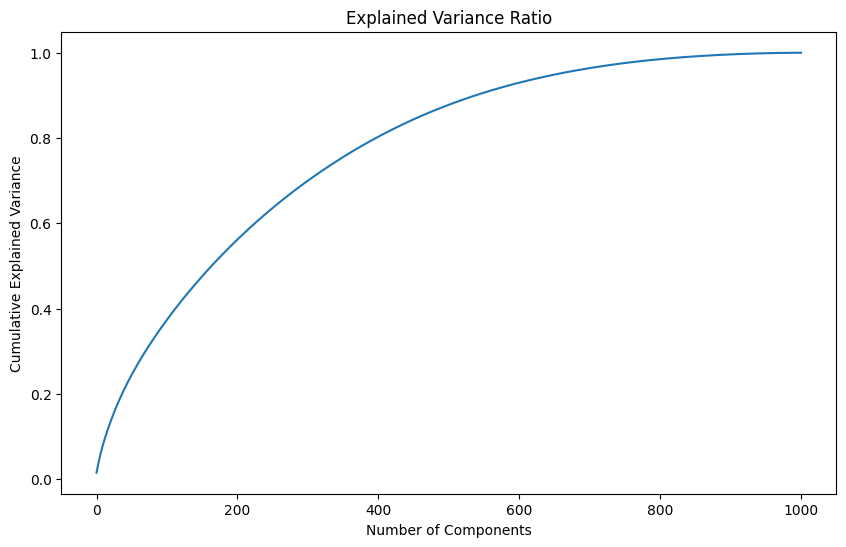

Number of components to explain 95% of variance: 655


/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/clus

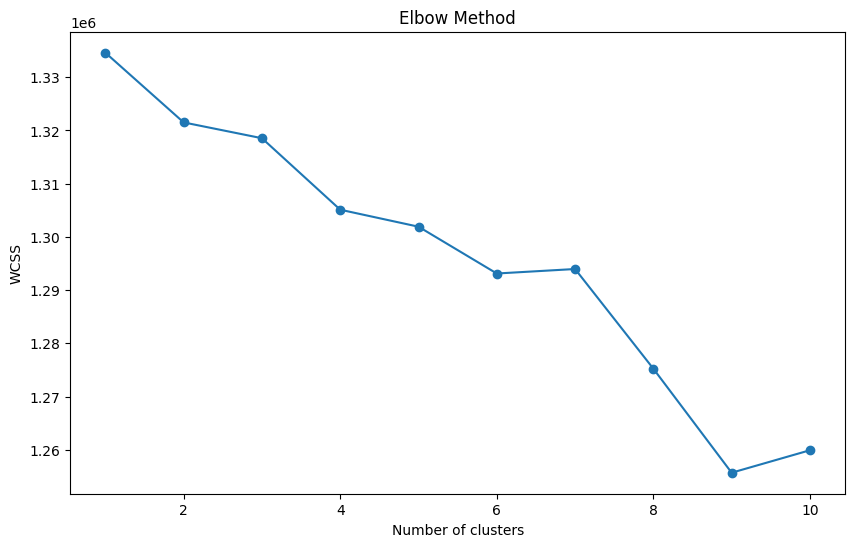

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


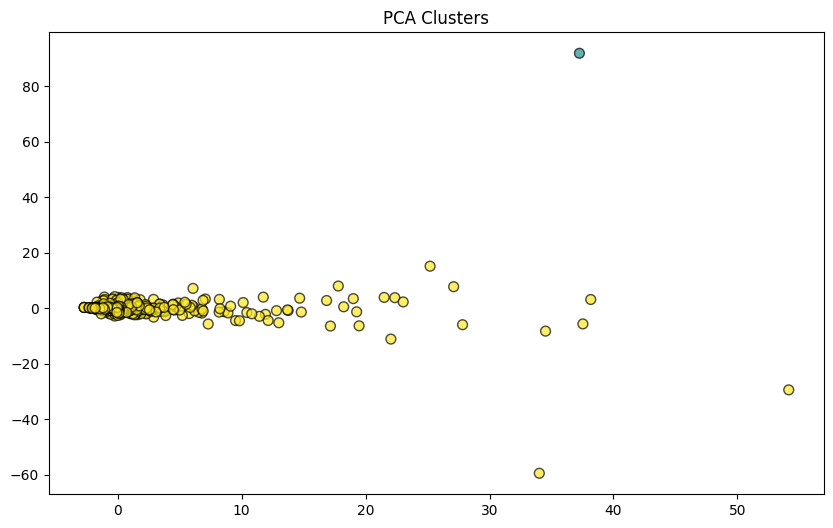

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Loading data and preprocessing
data = pd.read_csv('suicide.csv')
data.dropna(subset=['Tweet'], inplace=True)  # Ensure you're using the correct column name

# Vectorize tweets with BoW
vectorizer = CountVectorizer(max_features=1000)
X_bow = vectorizer.fit_transform(data['Tweet']).toarray()

# Compute VADER compound scores
analyzer = SentimentIntensityAnalyzer()
vader_scores = np.array([analyzer.polarity_scores(tweet)['compound'] for tweet in data['Tweet']])

# Combine BoW features with VADER scores
X_combined = np.hstack((X_bow, vader_scores.reshape(-1, 1)))

# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_combined)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Explained Variance Ratio Plot to determine the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Based on the plot, choose the optimal number of components (e.g., where cumulative variance ~0.95)
n_components_optimal = 50  # Adjust this based on your plot

# Re-apply PCA with the selected number of components
pca_optimal = PCA(n_components=n_components_optimal)
X_pca_optimal = pca_optimal.fit_transform(X_standardized)

# Split into training and validation sets (80% train, 20% validation)
X_train, X_validation = train_test_split(X_pca_optimal, test_size=0.2, random_state=42)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Elbow Method Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters based on the plot
n_clusters_optimal = 3  # Adjust this based on your observation

# Apply k-means clustering with the optimal number of clusters
kmeans_final = KMeans(n_clusters=n_clusters_optimal, random_state=42)
clusters = kmeans_final.fit_predict(X_train)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.7)
plt.title('PCA Clusters')
plt.show()


In [4]:
pip install vaderSentiment

  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata (572 bytes)
Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)
Note: you may need to restart the kernel to use updated packages.


/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/clus

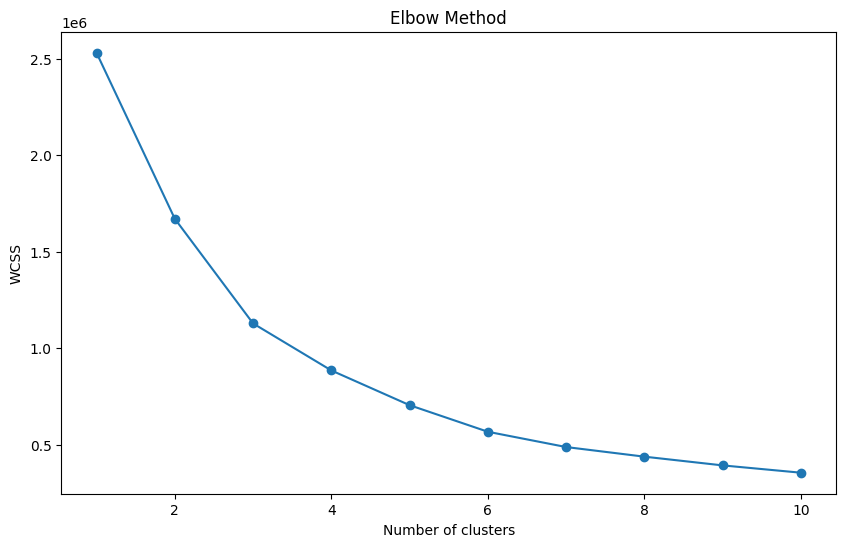

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


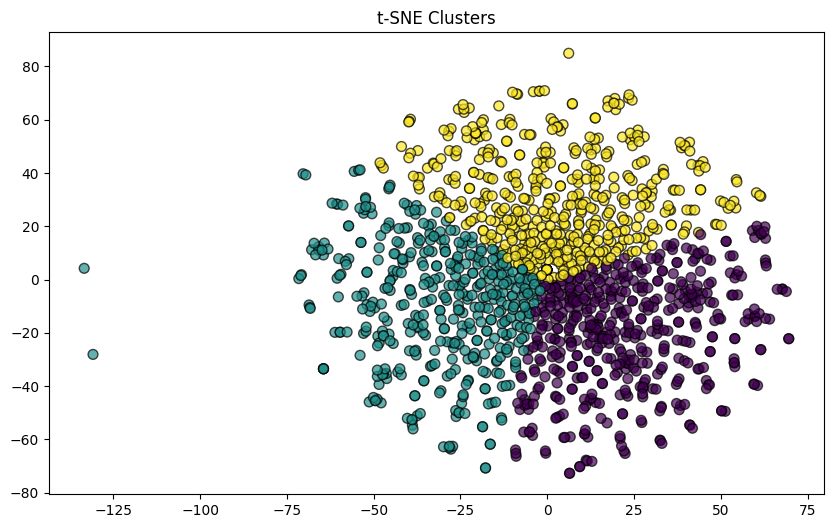

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Loading data and preprocessing
data = pd.read_csv('suicide.csv')
data.dropna(subset=['Tweet'], inplace=True)

# Vectorize tweets with BoW
vectorizer = CountVectorizer(max_features=1000)
X_bow = vectorizer.fit_transform(data['Tweet']).toarray()

# Compute VADER compound scores
analyzer = SentimentIntensityAnalyzer()
vader_scores = np.array([analyzer.polarity_scores(tweet)['compound'] for tweet in data['Tweet']])

# Combine BoW features with VADER scores
X_combined = np.hstack((X_bow, vader_scores.reshape(-1, 1)))

# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_combined)

# Split into training and validation sets (80% train, 20% validation)
X_train, X_validation = train_test_split(X_standardized, test_size=0.2, random_state=42)

# Apply t-SNE to the training data
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Optional: Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train_tsne)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters based on the plot
n_clusters_optimal = 3  # Adjust this based on your observation

# Apply k-means clustering with the optimal number of clusters
kmeans_final = KMeans(n_clusters=n_clusters_optimal, random_state=42)
clusters = kmeans_final.fit_predict(X_train_tsne)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.7)
plt.title('t-SNE Clusters')
plt.show()


/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/clus

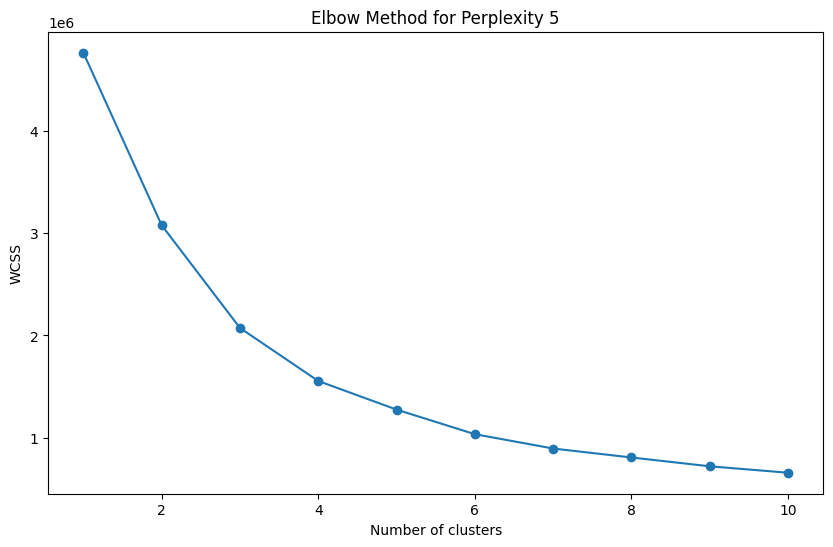

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


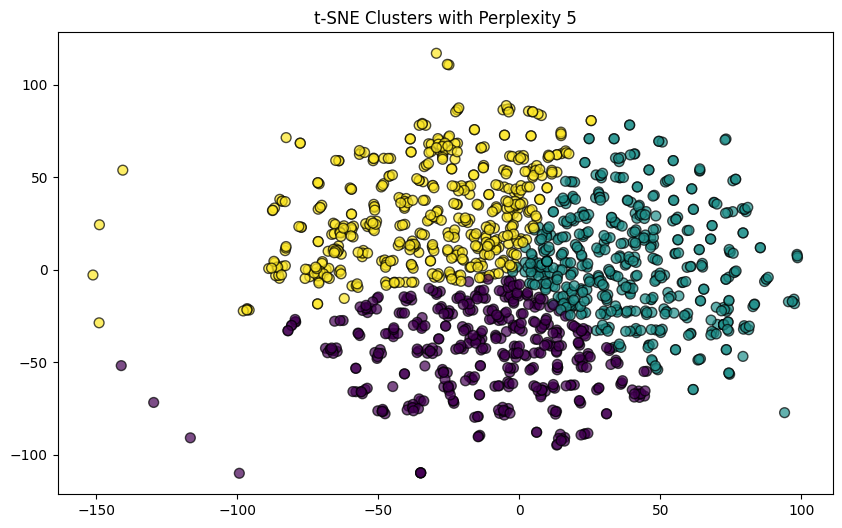

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/clus

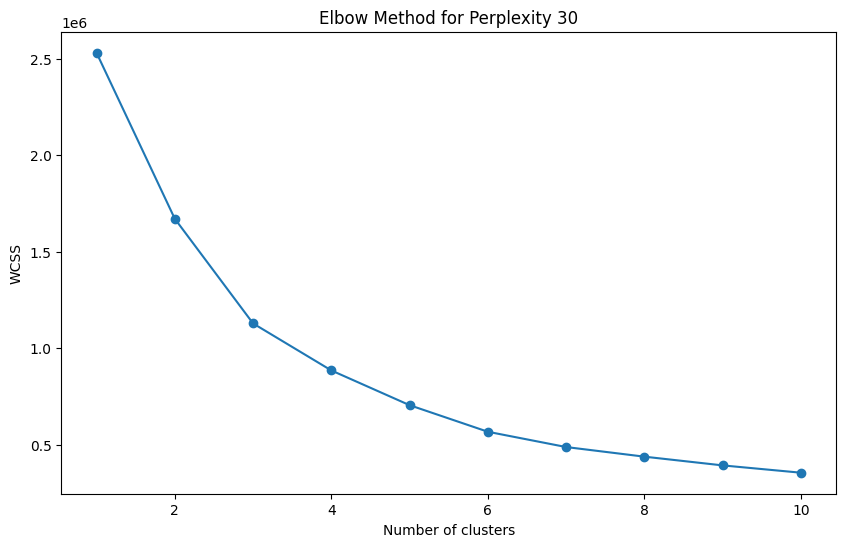

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


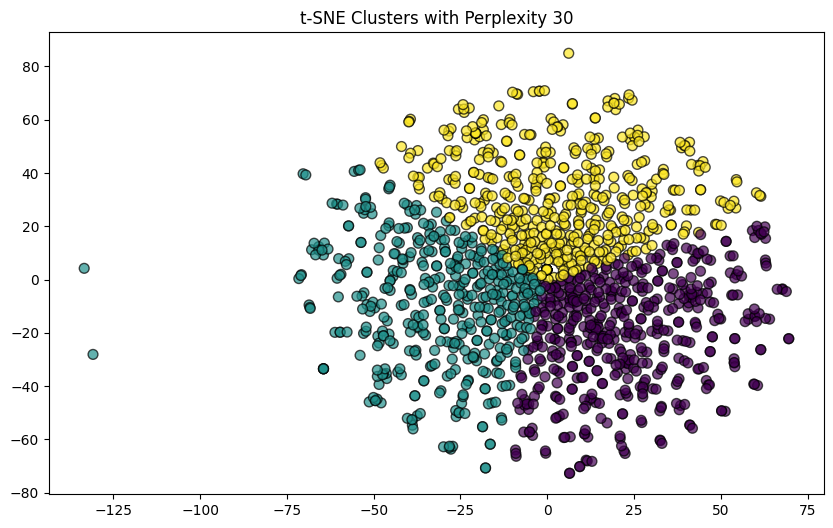

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/clus

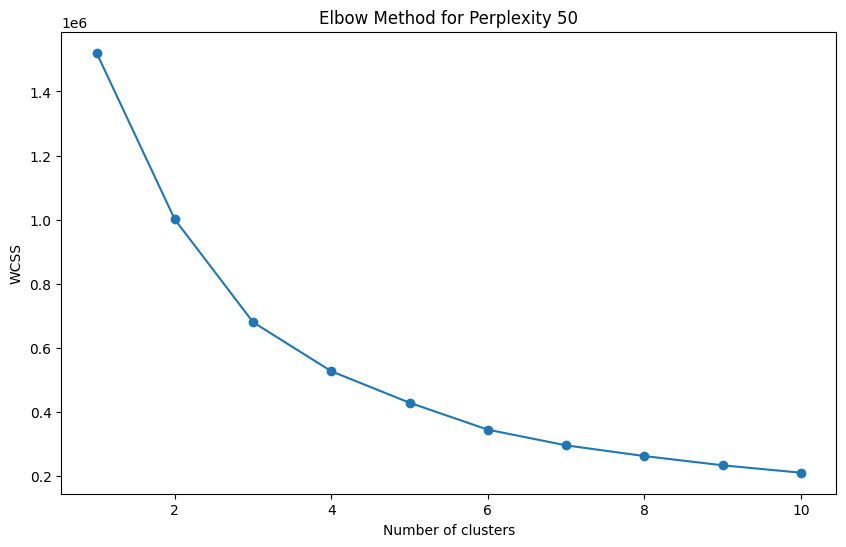

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


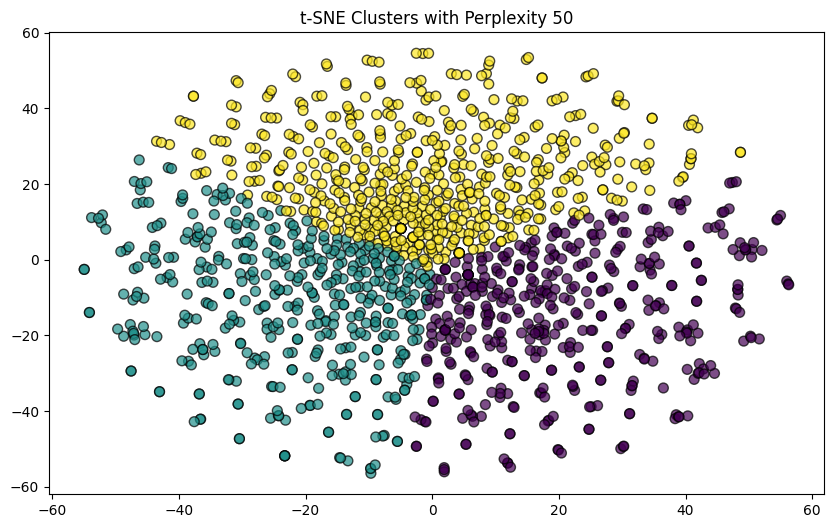

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/clus

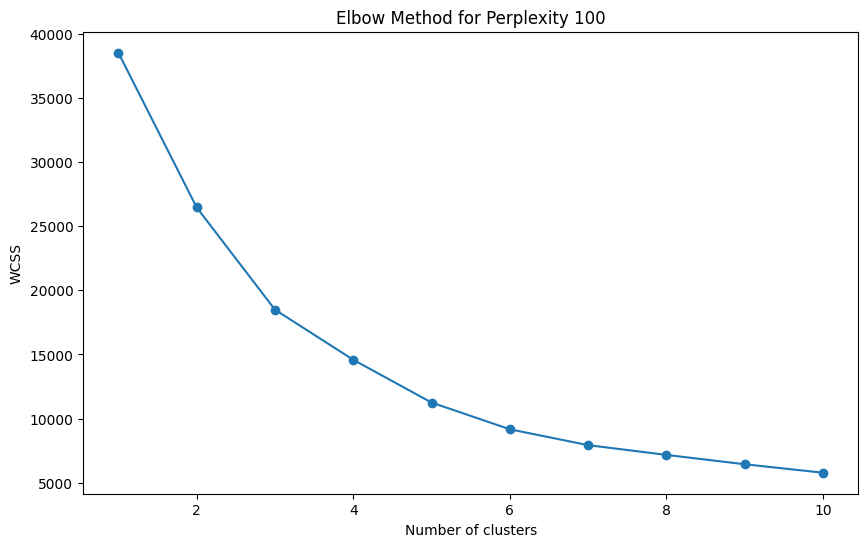

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


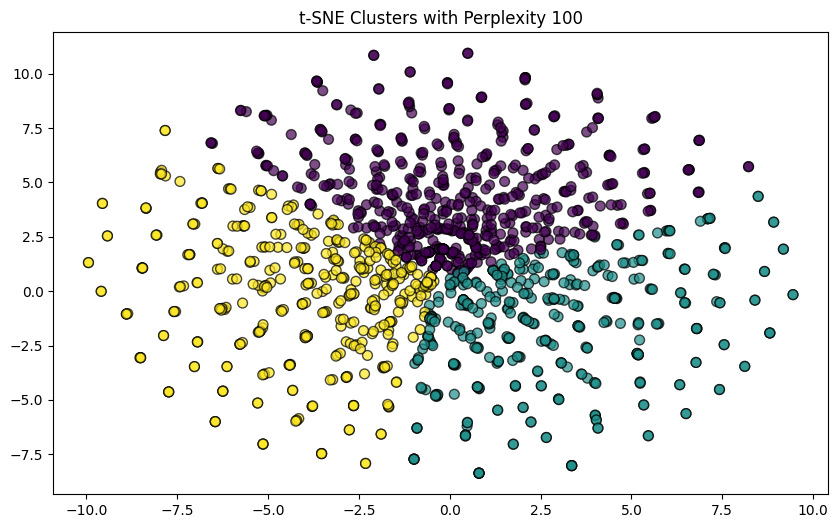

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Loading data and preprocessing
data = pd.read_csv('suicide.csv')
data.dropna(subset=['Tweet'], inplace=True)

# Vectorize tweets with BoW
vectorizer = CountVectorizer(max_features=1000)
X_bow = vectorizer.fit_transform(data['Tweet']).toarray()

# Compute VADER compound scores
analyzer = SentimentIntensityAnalyzer()
vader_scores = np.array([analyzer.polarity_scores(tweet)['compound'] for tweet in data['Tweet']])

# Combine BoW features with VADER scores
X_combined = np.hstack((X_bow, vader_scores.reshape(-1, 1)))

# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_combined)

# Split into training and validation sets (80% train, 20% validation)
X_train, X_validation = train_test_split(X_standardized, test_size=0.2, random_state=42)

# ... previous code ...

# Split into training and validation sets (80% train, 20% validation)
X_train, X_validation = train_test_split(X_standardized, test_size=0.2, random_state=42)

# Assuming X_train has already been standardized
perplexities = [5, 30, 50, 100]
for perp in perplexities:
    # Apply t-SNE to the training data with the current perplexity
    tsne = TSNE(n_components=2, perplexity=perp, learning_rate=200, n_iter=1000, random_state=42)
    X_train_tsne = tsne.fit_transform(X_train)
    
    # Determine the optimal number of clusters using the Elbow Method for the current t-SNE output
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X_train_tsne)
        wcss.append(kmeans.inertia_)

    # Plot the Elbow Method results for the current perplexity
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title(f'Elbow Method for Perplexity {perp}')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Choose the optimal number of clusters based on the plot and apply k-means clustering
    # This is where you would inspect the plot and decide on the optimal number of clusters.
    # For demonstration, let's use 3 as chosen previously.
    n_clusters_optimal = 3
    kmeans_final = KMeans(n_clusters=n_clusters_optimal, random_state=42)
    clusters = kmeans_final.fit_predict(X_train_tsne)

    # Visualization for the current perplexity
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.7)
    plt.title(f't-SNE Clusters with Perplexity {perp}')
    plt.show()



/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


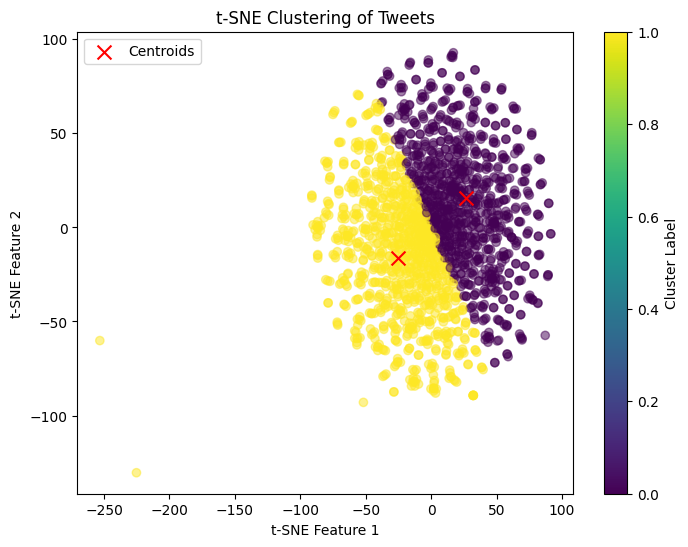

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Standardize features before t-SNE
scaler = StandardScaler()
bow_matrix_normalized = scaler.fit_transform(bow_matrix.toarray())

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=3000, random_state=42)
tsne_results = tsne.fit_transform(bow_matrix_normalized)

# Clustering with KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tsne_results)
data['cluster_label'] = kmeans.labels_

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('t-SNE Clustering of Tweets')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Further dimensionality reduction and visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_matrix = tsne.fit_transform(bow_matrix)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of square
for i in range(1, 15):  # Test a range of k values, for example from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(tsne_matrix)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

optimal_k = 4

# Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster_label'] = kmeans.fit_predict(tsne_matrix)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the clusters
plt.scatter(tsne_matrix[:, 0], tsne_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

# Plot details
plt.title('K-Means Clustering of Tweets with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


#------------------------------------
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Coefficient for different numbers of clusters
silhouette_scores = []
for i in range(2, 15):  # Typically start with 2 clusters, as silhouette score is not defined for a single cluster
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(tsne_matrix)
    score = silhouette_score(tsne_matrix, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Silhouette Coefficient Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.show()

# Find the number of clusters with the highest Silhouette Coefficient
optimal_k2 = range(2, 15)[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_k}")

# Now that we have the optimal number of clusters, let's perform KMeans clustering again
kmeans = KMeans(n_clusters=optimal_k2, random_state=42)
data['cluster_label'] = kmeans.fit_predict(tsne_matrix)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the clusters
plt.scatter(tsne_matrix[:, 0], tsne_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

# Plot details
plt.title('K-Means Clustering of Tweets with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

TypeError: PCA initialization is currently not supported with the sparse input matrix. Use init="random" instead.

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/clus

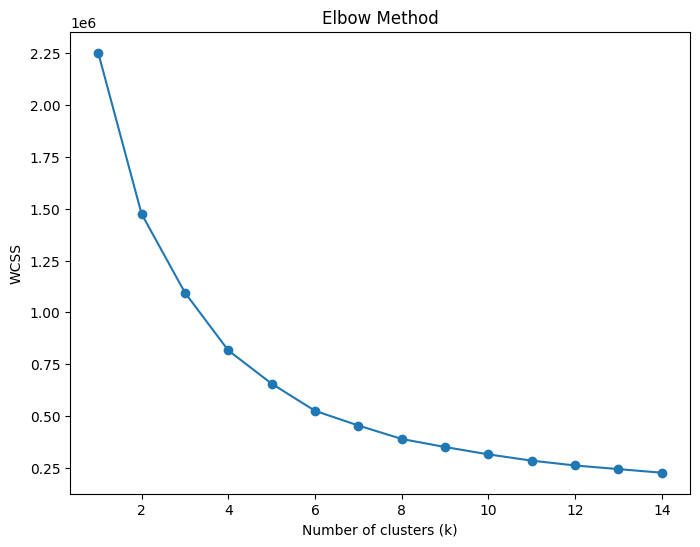

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


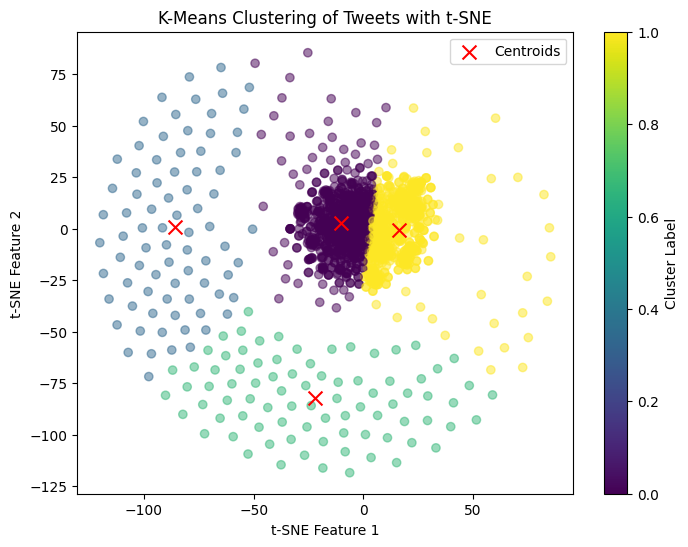

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/clus

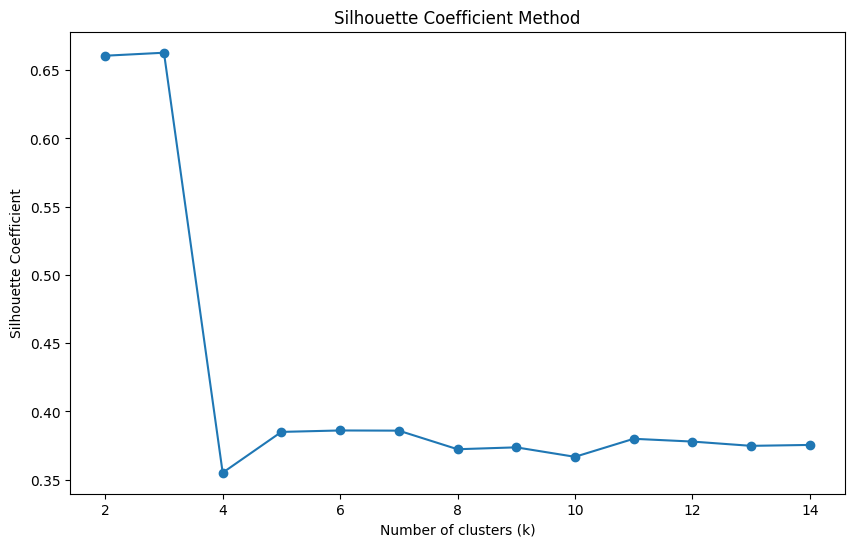

The optimal number of clusters is: 4


/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


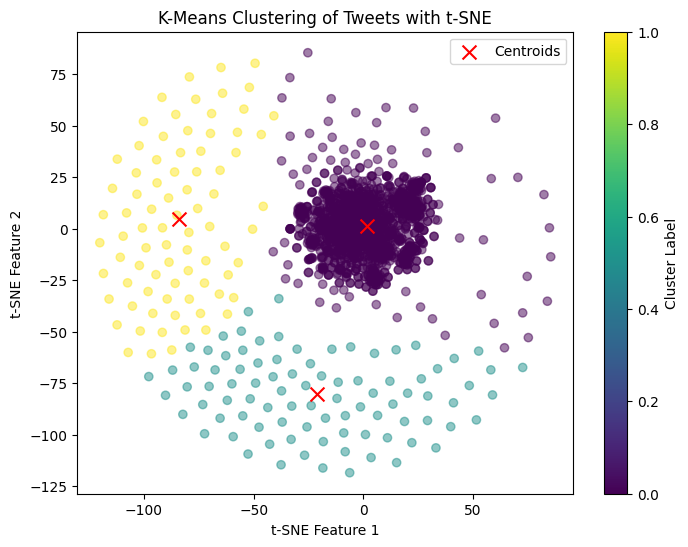

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Get the VADER compound sentiment score for each tweet
data['sentiment_score'] = data['Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000, binary=True)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

#print(data['Tweet'])

# Convert sparse matrix to dense matrix
bow_matrix_dense = bow_matrix.toarray()

#print(bow_matrix_dense)

# Standardize the features (important for k-means and t-SNE)
# scaler = StandardScaler()
# bow_matrix_dense = scaler.fit_transform(bow_matrix_dense)

#print(bow_matrix_dense)

# Combine Bag of Words matrix with sentiment scores
# Reshape sentiment scores to be added as a feature
# sentiment_scores = data['sentiment_score'].values.reshape(-1, 1)
# features_combined = np.hstack((bow_matrix_dense, sentiment_scores))

np.savetxt('data_array.txt', bow_matrix_dense)

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_matrix = tsne.fit_transform(bow_matrix_dense)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of square
for i in range(1, 15):  # Test a range of k values, for example from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(tsne_matrix)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

optimal_k = 4

# Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster_label'] = kmeans.fit_predict(tsne_matrix)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the clusters
plt.scatter(tsne_matrix[:, 0], tsne_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

# Plot details
plt.title('K-Means Clustering of Tweets with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


#------------------------------------
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Coefficient for different numbers of clusters
silhouette_scores = []
for i in range(2, 15):  # Typically start with 2 clusters, as silhouette score is not defined for a single cluster
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(tsne_matrix)
    score = silhouette_score(tsne_matrix, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Silhouette Coefficient Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.show()

# Find the number of clusters with the highest Silhouette Coefficient
optimal_k2 = range(2, 15)[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_k}")

# Now that we have the optimal number of clusters, let's perform KMeans clustering again
kmeans = KMeans(n_clusters=optimal_k2, random_state=42)
data['cluster_label'] = kmeans.fit_predict(tsne_matrix)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the clusters
plt.scatter(tsne_matrix[:, 0], tsne_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

# Plot details
plt.title('K-Means Clustering of Tweets with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_

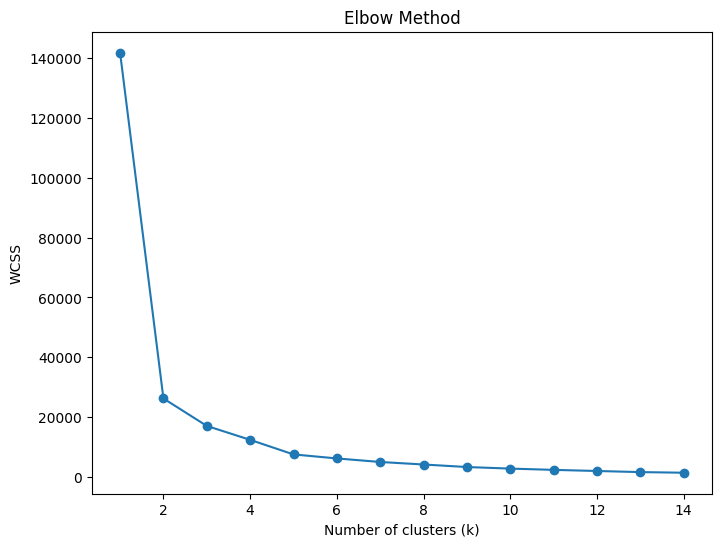

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


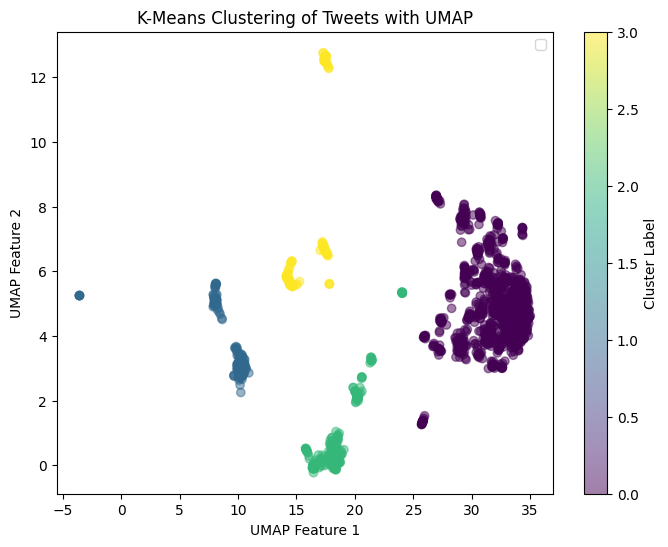

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from sklearn.cluster import KMeans
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Get the VADER compound sentiment score for each tweet
data['sentiment_score'] = data['Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000, binary=True)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Convert sparse matrix to dense matrix
bow_matrix_dense = bow_matrix.toarray()

# Dimensionality reduction using UMAP
umap = UMAP(n_components=2, n_neighbors=5, min_dist=0.1, random_state=42)
umap_matrix = umap.fit_transform(bow_matrix_dense)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(umap_matrix)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

optimal_k = 4

# Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster_label'] = kmeans.fit_predict(umap_matrix)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(umap_matrix[:, 0], umap_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering of Tweets with UMAP')
plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/clus

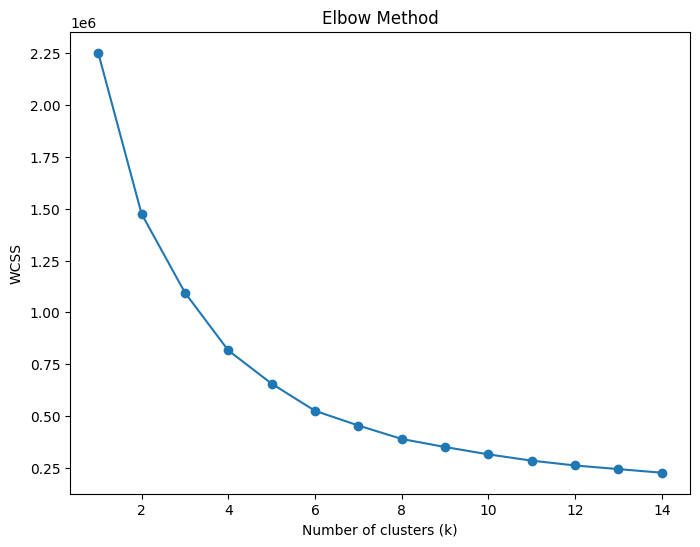

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


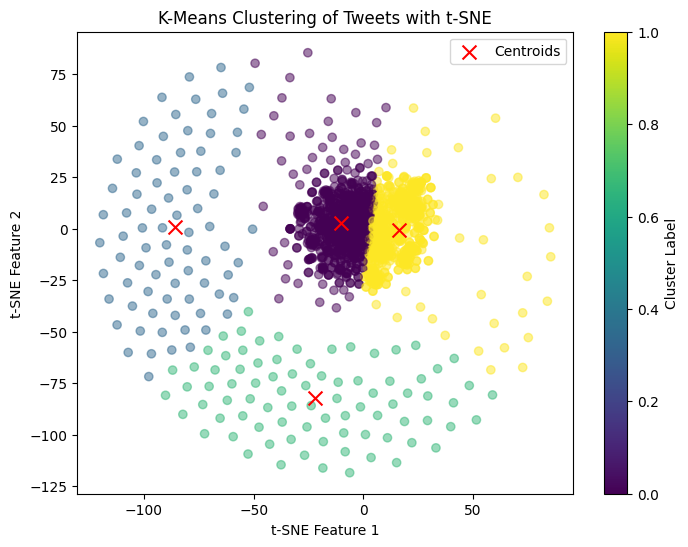

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/clus

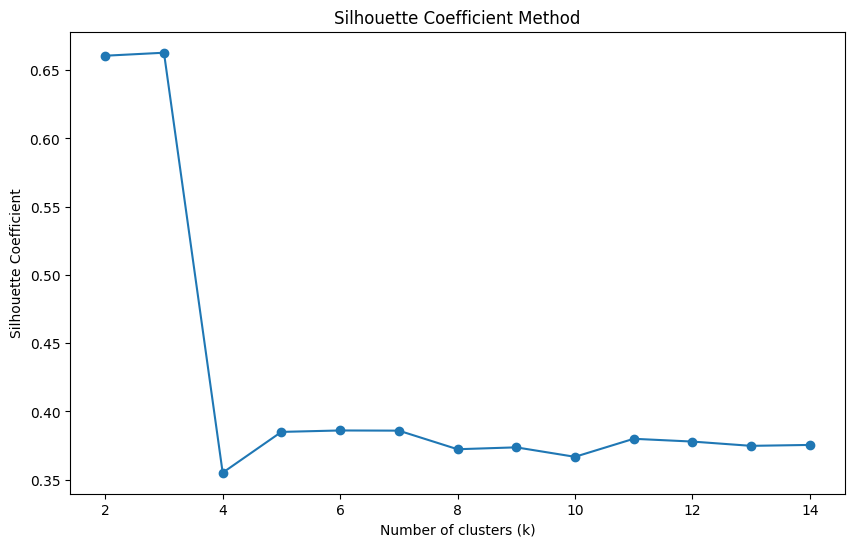

The optimal number of clusters is: 4


/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


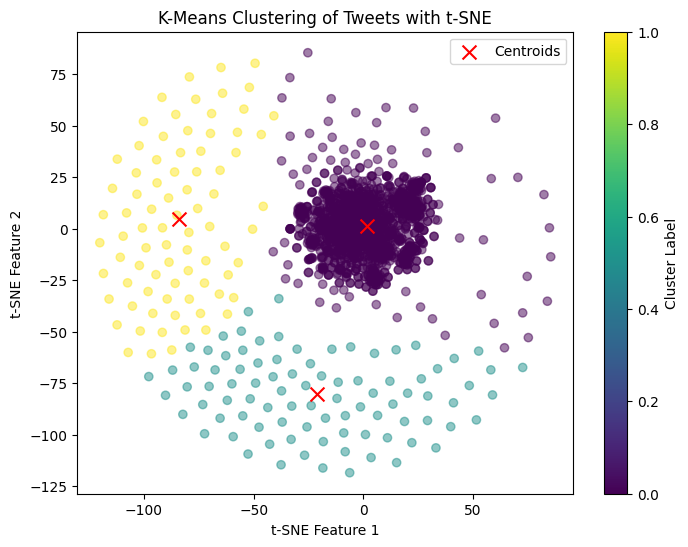

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Get the VADER compound sentiment score for each tweet
data['sentiment_score'] = data['Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000, binary=True)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

#print(data['Tweet'])

# Convert sparse matrix to dense matrix
bow_matrix_dense = bow_matrix.toarray()

#print(bow_matrix_dense)

# Standardize the features (important for k-means and t-SNE)
# scaler = StandardScaler()
# bow_matrix_dense = scaler.fit_transform(bow_matrix_dense)

#print(bow_matrix_dense)

# Combine Bag of Words matrix with sentiment scores
# Reshape sentiment scores to be added as a feature
# sentiment_scores = data['sentiment_score'].values.reshape(-1, 1)
# features_combined = np.hstack((bow_matrix_dense, sentiment_scores))

np.savetxt('data_array.txt', bow_matrix_dense)

# t-SNE for dimensionality reduction
# PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)  # Initialize PCA
pca_matrix = pca.fit_transform(bow_matrix_dense)  # Apply PCA transformation

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of square
for i in range(1, 15):  # Test a range of k values, for example from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(tsne_matrix)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

optimal_k = 4

# Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster_label'] = kmeans.fit_predict(tsne_matrix)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the clusters
plt.scatter(tsne_matrix[:, 0], tsne_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

# Plot details
plt.title('K-Means Clustering of Tweets with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


#------------------------------------
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Coefficient for different numbers of clusters
silhouette_scores = []
for i in range(2, 15):  # Typically start with 2 clusters, as silhouette score is not defined for a single cluster
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(tsne_matrix)
    score = silhouette_score(tsne_matrix, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Silhouette Coefficient Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.show()

# Find the number of clusters with the highest Silhouette Coefficient
optimal_k2 = range(2, 15)[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_k}")

# Now that we have the optimal number of clusters, let's perform KMeans clustering again
kmeans = KMeans(n_clusters=optimal_k2, random_state=42)
data['cluster_label'] = kmeans.fit_predict(tsne_matrix)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the clusters
plt.scatter(tsne_matrix[:, 0], tsne_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

# Plot details
plt.title('K-Means Clustering of Tweets with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

[[ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.0772]
 [ 0.      0.      0.     ...  0.      0.     -0.3818]
 ...
 [ 0.      0.      0.     ...  0.      0.      0.3818]
 [ 0.      0.      0.     ...  0.      0.      0.5267]
 [ 0.      0.      0.     ...  0.      0.      0.6697]]


/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/clus

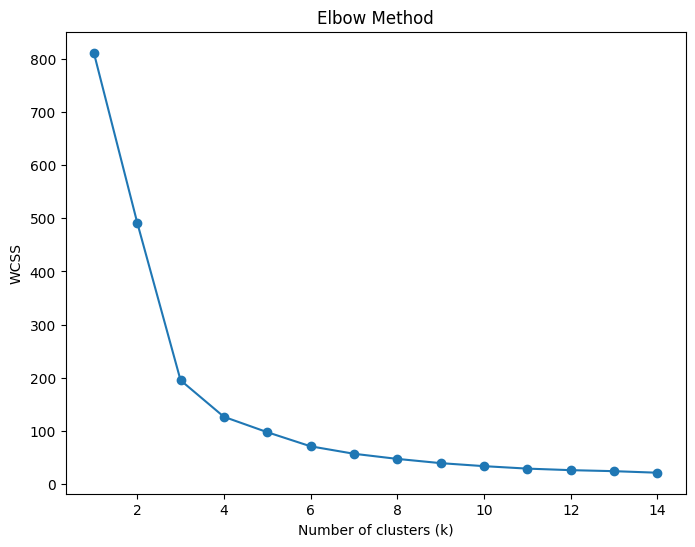

/Users/daphnewu/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


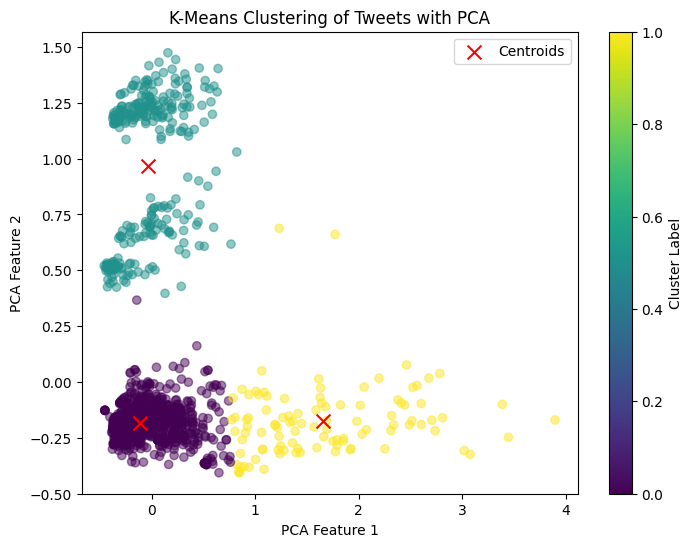

Text: make lunch | Sentiment: Positive
Text: alexia want money | Sentiment: Positive
Text: dizzyhrvy crap take forever put together go go sleep day | Sentiment: Positive
Text: jnaylor kiwitweets hey jer since start twittering | Sentiment: Positive
Text: try quot delicious library quot mixed result bar code thought want add sport bra instead drill cool app tho | Sentiment: Positive
Text: valenvaldez oh good hear already continue holy week | Sentiment: Positive
Text: get list fellow hotties gon na share one amigo | Sentiment: Positive
Text: jakepaul jamescharles loganpaul shane make series doesnt mean people take seriously https co | Sentiment: Negative
Text: time warsaw beer garden chilling | Sentiment: Positive
Text: hate life lmao hope die soon sumn tire everything | Sentiment: Positive
Text: everything lover survival everything mother survival | Sentiment: Positive
Text: stray cat campus look like garfield student always feed fat like | Sentiment: Positive
Text: go | Sentiment: Posit

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA  # Import PCA
from sklearn.cluster import KMeans
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

texts = data['Tweet'].tolist()

# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Get the VADER compound sentiment score for each tweet
data['sentiment_score'] = data['Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000, binary=True)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Convert sparse matrix to dense matrix
bow_matrix_dense = bow_matrix.toarray()

# Standardize the features (important for k-means and PCA)
# scaler = StandardScaler()
# bow_matrix_dense = scaler.fit_transform(bow_matrix_dense)

# Combine Bag of Words matrix with sentiment scores
# Reshape sentiment scores to be added as a feature
sentiment_scores = data['sentiment_score'].values.reshape(-1, 1)
features_combined = np.hstack((bow_matrix_dense, sentiment_scores))

print(features_combined)

# PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)  # Initialize PCA
pca_matrix = pca.fit_transform(bow_matrix_dense)  # Apply PCA transformation

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of square
for i in range(1, 15):  # Test a range of k values
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_matrix)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

optimal_k = 3

# Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster_label'] = kmeans.fit_predict(pca_matrix)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the clusters
plt.scatter(pca_matrix[:, 0], pca_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

# Plot details
plt.title('K-Means Clustering of Tweets with PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

labels = kmeans.labels_
sentiment_labels = ['Positive' if label == 0 else 'Negative' for label in labels]

# Output sentiment labels for each text
for i, text in enumerate(texts):
    print(f"Text: {text} | Sentiment: {sentiment_labels[i]}")

# Define the filename for the output text file
output_file = "sentiment_labels.txt"

# Open the output file in write mode
with open(output_file, "w") as f:
    # Loop through each text and its corresponding sentiment label
    for text, sentiment_label in zip(texts, sentiment_labels):
        # Write the text and its sentiment label to the file
        print(f"Text: {text} | Sentiment: {sentiment_label}", file=f)

print("Sentiment labels exported to:", output_file)


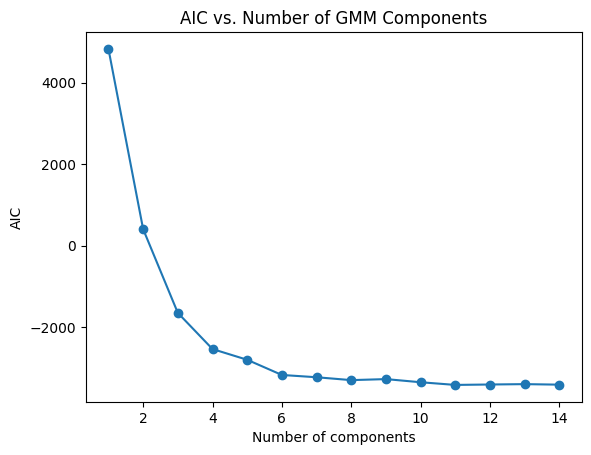

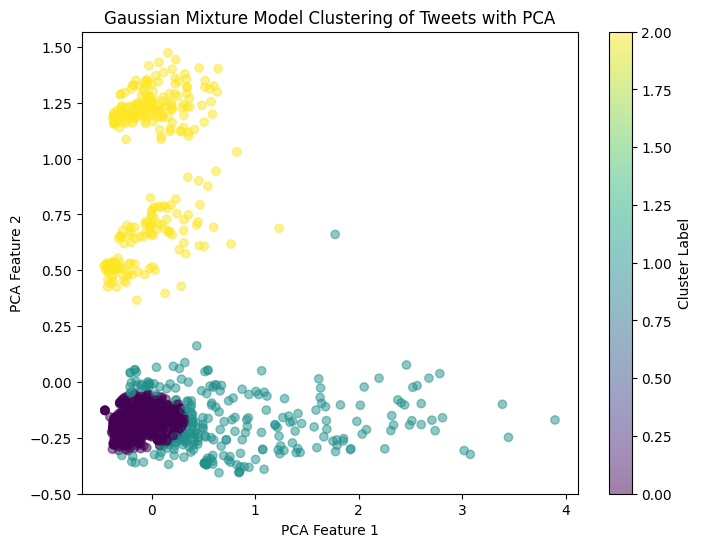

Sentiment labels exported to: sentiment_labels2.txt


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA  
from sklearn.mixture import GaussianMixture  # Import GaussianMixture
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

texts = data['Tweet'].tolist()

# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Get the VADER compound sentiment score for each tweet
data['sentiment_score'] = data['Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000, binary=True)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Convert sparse matrix to dense matrix
bow_matrix_dense = bow_matrix.toarray()

# PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)  # Initialize PCA
pca_matrix = pca.fit_transform(bow_matrix_dense)  # Apply PCA transformation

# Determine the optimal number of components using the Akaike information criterion (AIC)
n_components = np.arange(1, 15)
models = [GaussianMixture(n, random_state=42).fit(pca_matrix) for n in n_components]
plt.plot(n_components, [m.aic(pca_matrix) for m in models], marker='o')
plt.xlabel('Number of components')
plt.ylabel('AIC')
plt.title('AIC vs. Number of GMM Components')
plt.show()

# Choose the optimal number of components with the lowest AIC
optimal_n_components = np.argmin([m.aic(pca_matrix) for m in models]) + 1

# Clustering with Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
data['cluster_label'] = gmm.fit_predict(pca_matrix)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(pca_matrix[:, 0], pca_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
plt.title('Gaussian Mixture Model Clustering of Tweets with PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Output sentiment labels for each text
labels = gmm.predict(pca_matrix)
sentiment_labels = ['Positive' if label == 0 else 'Negative' for label in labels]

# Export sentiment labels to a text file
output_file = "sentiment_labels2.txt"
with open(output_file, "w") as f:
    for text, sentiment_label in zip(texts, sentiment_labels):
        print(f"Text: {text} | Sentiment: {sentiment_label}", file=f)

print("Sentiment labels exported to:", output_file)


Best Silhouette Score: 0.7663850069279426
Best eps: 0.5
Best min_samples: 15


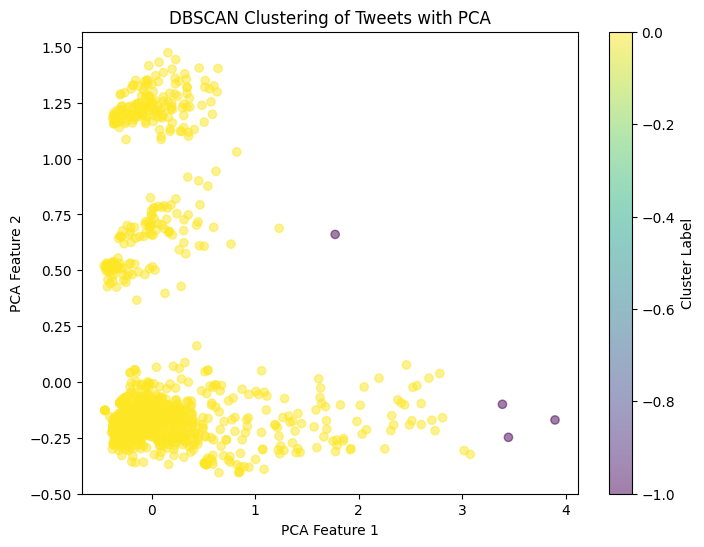

Sentiment labels exported to: sentiment_labels_dbscan.txt


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import silhouette_score

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

texts = data['Tweet'].tolist()

# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Get the VADER compound sentiment score for each tweet
data['sentiment_score'] = data['Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000, binary=True)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Convert sparse matrix to dense matrix
bow_matrix_dense = bow_matrix.toarray()

# PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)  # Initialize PCA
pca_matrix = pca.fit_transform(bow_matrix_dense)  # Apply PCA transformation

# Define range of eps and min_samples values to search over
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

best_score = -1
best_eps = None
best_min_samples = None
best_labels = None

# Perform grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(pca_matrix)
        unique_labels = np.unique(labels)
        if len(unique_labels) > 1:  # Ensure more than one cluster
            score = silhouette_score(pca_matrix, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

print("Best Silhouette Score:", best_score)
print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)

# Use the best parameters to perform DBSCAN clustering
dbscan = DBSCAN(eps=0.05, min_samples=3)
data['cluster_label'] = best_labels

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(pca_matrix[:, 0], pca_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering of Tweets with PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Output sentiment labels for each text
labels = best_labels
sentiment_labels = ['Positive' if label == 0 else 'Negative' for label in labels]

# Export sentiment labels to a text file
output_file = "sentiment_labels_dbscan.txt"
with open(output_file, "w") as f:
    for text, sentiment_label in zip(texts, sentiment_labels):
        print(f"Text: {text} | Sentiment: {sentiment_label}", file=f)

print("Sentiment labels exported to:", output_file)


Best Silhouette Score: 0.6786065789174894
Best n_clusters: 3


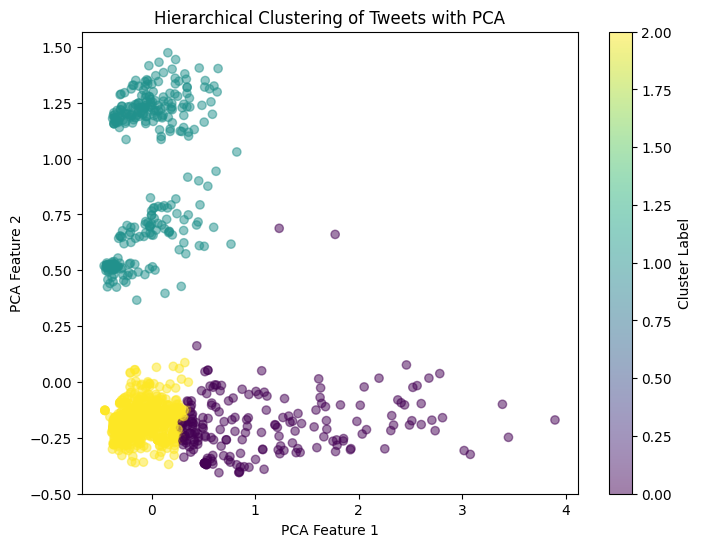

Sentiment labels exported to: sentiment_labels_hierarchical.txt


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering  # Import AgglomerativeClustering for hierarchical clustering
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import silhouette_score

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

texts = data['Tweet'].tolist()

# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Get the VADER compound sentiment score for each tweet
data['sentiment_score'] = data['Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000, binary=True)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Convert sparse matrix to dense matrix
bow_matrix_dense = bow_matrix.toarray()

# PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)  # Initialize PCA
pca_matrix = pca.fit_transform(bow_matrix_dense)  # Apply PCA transformation

# Define range of n_clusters values for hierarchical clustering
n_clusters_values = [2, 3, 4]  # Example range of cluster numbers

best_score = -1
best_n_clusters = None
best_labels = None

# Perform grid search
for n_clusters in n_clusters_values:
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(pca_matrix)
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1:  # Ensure more than one cluster
        score = silhouette_score(pca_matrix, labels)
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
            best_labels = labels

print("Best Silhouette Score:", best_score)
print("Best n_clusters:", best_n_clusters)

# Use the best parameters to perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=best_n_clusters)
data['cluster_label'] = best_labels

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(pca_matrix[:, 0], pca_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
plt.title('Hierarchical Clustering of Tweets with PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Output sentiment labels for each text
labels = best_labels
sentiment_labels = ['Positive' if label == 0 else 'Negative' for label in labels]

# Export sentiment labels to a text file
output_file = "sentiment_labels_hierarchical.txt"
with open(output_file, "w") as f:
    for text, sentiment_label in zip(texts, sentiment_labels):
        print(f"Text: {text} | Sentiment: {sentiment_label}", file=f)

print("Sentiment labels exported to:", output_file)
